In [1]:
'''
=== Dependency Block ===
- Try not to change the already imported ones since others' code may depend on it.
- Try to use the same version of dependencies as described in [requirements.txt] file.
- Add your dependencies below if necessary.
'''

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DATA_PATH = "./data.csv"

df = pd.read_csv(DATA_PATH,)

In [2]:
# === Overview_1 ===
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [3]:
# === Overview_2 ===
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# My Awesome Markdown Description

- Here is some markdown text that describe your visualization.

- Visit [this link](https://www.markdownguide.org/cheat-sheet/) to get more syntax info.


In [4]:
# this is your DV code block

# What Movie Genres are Most Loved and Profitable

- In this section, we use boxplot to explore what genres of movie are most loved and profitable.
- In the raw data, each movie can have multiple genres (split by |). We choose the first genre as representative.
- We use Return on Investment(ROI) to evaluate profitability. The formula is

```
          (Gross - Budget)  
ROI =  ---------------------- X 100%
               Budget 
```

In [5]:
# ===== data process block =====

# sub dataframe
sub_df = df[["genres","gross","budget","imdb_score"]].dropna()

# add extra columns
sub_df["genres_cln"] = sub_df["genres"].str.split("|").str[0]
sub_df["roi"] = (sub_df["gross"]-sub_df["budget"])*100 / sub_df["budget"]

# process genres 
genres = sub_df["genres_cln"].unique()
# remove genres with count less than 40
THRESHOLD = 40
genres_cln = list()
for g in genres:
    if len(sub_df.loc[sub_df["genres_cln"]== g ])>THRESHOLD :
        genres_cln.append(g)
        
# arrays for boxplot
arrays_imdb_score = [ sub_df.loc[sub_df["genres_cln"]==v]["imdb_score"] for v in genres_cln]
arrays_roi = [ sub_df.loc[sub_df["genres_cln"]==v]["roi"] for v in genres_cln]

# export
sub_df
genres_cln
arrays_imdb_score
arrays_roi

[0         220.888543
 1           3.134717
 2         -18.337071
 3          79.252257
 5         -72.294775
 6          30.438102
 8          83.596640
 10         32.099625
 11         -4.273011
 12        -15.815786
 13         88.014501
 14        -58.469809
 15         29.342918
 16        -37.060434
 17        183.308885
 18         -3.574450
 19        -20.435176
 21         13.926375
 22        -47.390132
 25          5.338773
 27         62.878913
 28        -68.816670
 29        334.784847
 30         52.180138
 31         86.688947
 32        104.496136
 34         11.600007
 36        101.038344
 37         16.870541
 39          1.426967
             ...     
 4247     1140.000000
 4248      -65.523217
 4254      350.150550
 4255      477.327150
 4277       66.791950
 4298      -93.775300
 4318      -99.752100
 4401      126.483212
 4403      973.283545
 4446       33.389405
 4466      -45.099155
 4518       27.272727
 4523      273.193000
 4537     1360.639545
 4542     

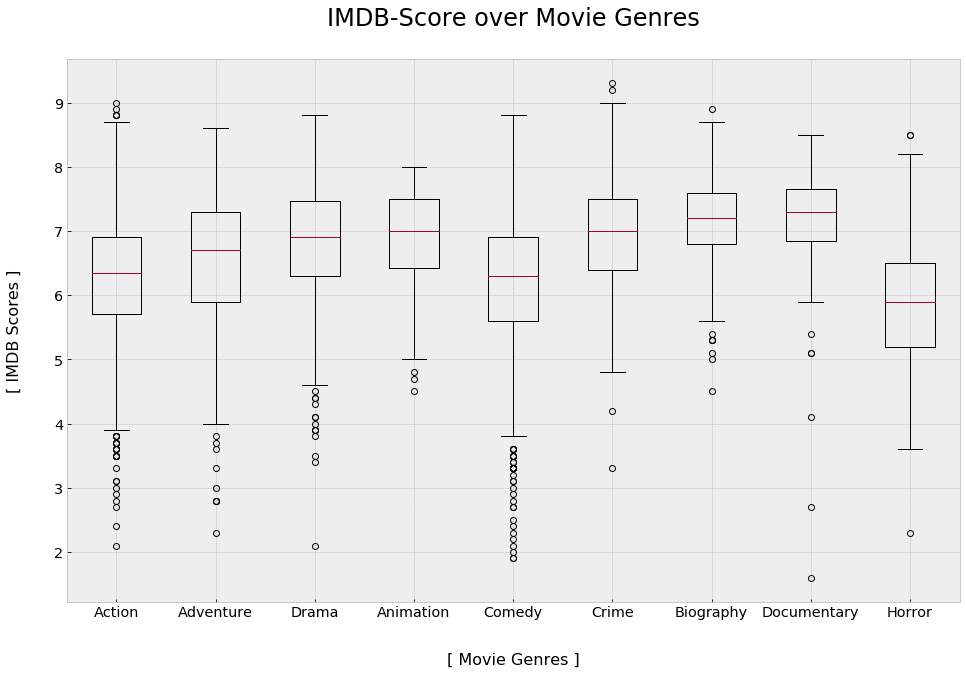

In [6]:
# ===== plot:IMDB-Score over Movie Genres  =====

# import data
genres_cln = genres_cln
arrays_imdb_score = arrays_imdb_score

# style
PLT_STYLE = "bmh"
RC_PARAMS = {
    "figure.figsize" : (16,10),
    "axes.labelsize" : 16,
    "axes.titlesize" : 24,
    "xtick.labelsize": 'x-large',
    "ytick.labelsize": 'x-large'
}
plt.style.use(PLT_STYLE)
plt.rcParams.update(RC_PARAMS)

# meta data
plt.title("IMDB-Score over Movie Genres",y=1.05)
plt.xlabel("[ Movie Genres ]",labelpad=32)
plt.ylabel("[ IMDB Scores ]",labelpad=32)

# plot
plt.boxplot(arrays_imdb_score)
plt.xticks([v for v in range(1,len(genres_cln)+1)],genres_cln)
plt.show()

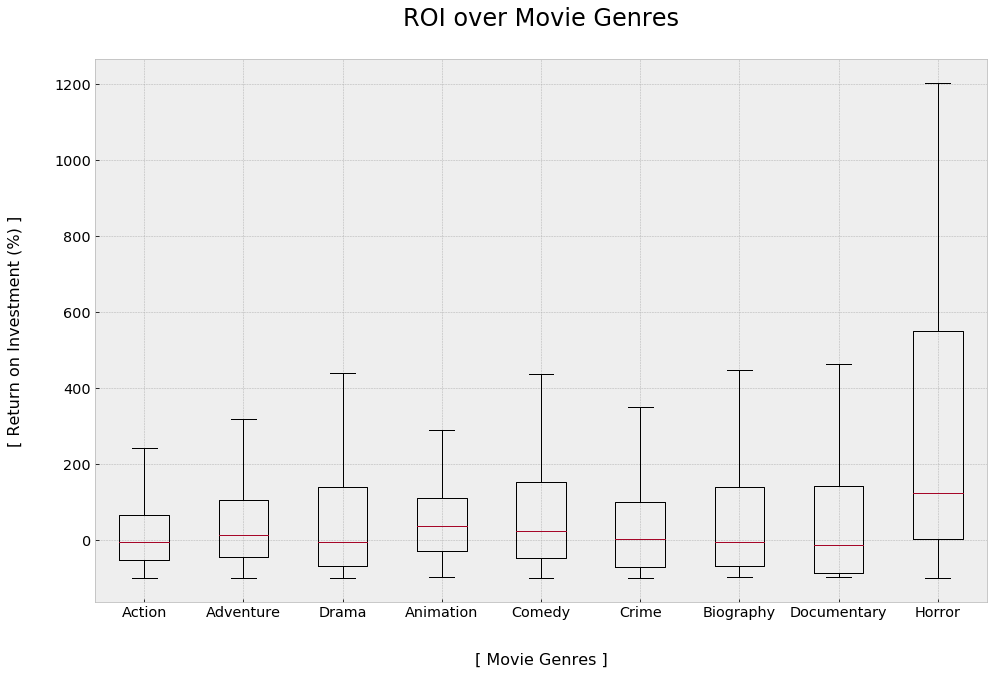

In [7]:
# ===== plot: ROI over Movie Genres  =====

# import data
genres_cln = genres_cln
arrays_roi = arrays_roi

# style
PLT_STYLE = "bmh"
RC_PARAMS = {
    "figure.figsize" : (16,10),
    "axes.labelsize" : 16,
    "axes.titlesize" : 24,
    "xtick.labelsize": 'x-large',
    "ytick.labelsize": 'x-large'
}
plt.style.use(PLT_STYLE)
plt.rcParams.update(RC_PARAMS)

# meta data
plt.title("ROI over Movie Genres",y=1.05)
plt.xlabel("[ Movie Genres ]",labelpad=32)
plt.ylabel("[ Return on Investment (%) ]",labelpad=32)
plt.margins(y=0.05)

# plot
plt.boxplot(arrays_roi, showfliers=False)
plt.xticks([v for v in range(1,len(genres_cln)+1)],genres_cln)
plt.show()

# What Kind of Movie Has Bigger Number of Faces in Poster?

+ In this section, we explore the correlation among face numbers in poster, genre, and content rating by generating a scatter plot
+ We use different sizes & colors of scatters to represent the average face numbers in posters of each genre & content rating

In [8]:
# ===== data process =====

# sub dataframe
sub_df = df[["genres","content_rating","facenumber_in_poster"]].dropna()

# extract top-level genres
sub_df["genres"] = sub_df["genres"].str.split("|").str[0]

# filter valid content ratings
invalid_content_ratings = ["Unrated", "Not Rated", "Approved", "Passed"]
sub_df = sub_df[np.isin(sub_df["content_rating"], invalid_content_ratings, invert=True)]

# aggregrate for scatter plot
sub_df = sub_df.groupby(["genres", "content_rating"]).mean()
genres = []
content_ratings = []
for genre, content_rating in sub_df.index.tolist():
    genres.append(genre)
    content_ratings.append(content_rating)
num_faces = sub_df.values

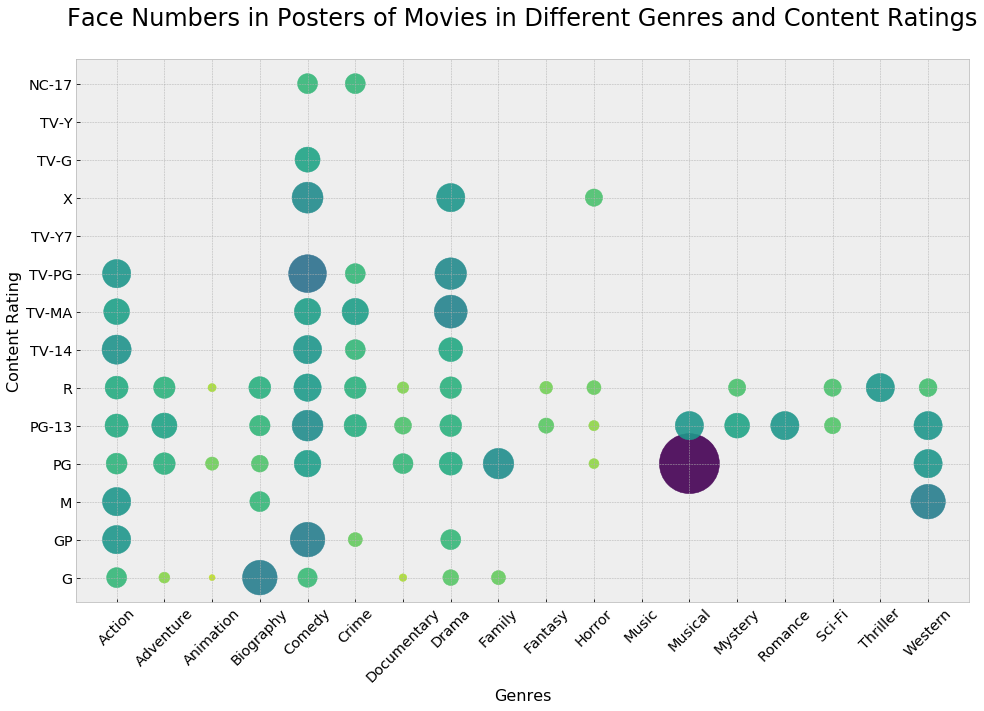

In [9]:
# ===== plot: Face Numbers in Posters v.s. Genres v.s. Content Ratings =====

# plot parameters
areas = num_faces * 400
colors = (10 - np.sqrt(num_faces * 2)).transpose()[0]

# plot
plt.scatter(genres, content_ratings, s=areas, marker="o", c=colors, alpha=0.9)

# style
plt.title("Face Numbers in Posters of Movies in Different Genres and Content Ratings", y=1.05)
plt.xlabel("Genres")
plt.ylabel("Content Rating")
plt.xticks(rotation=45)

plt.show()